In [1]:
# this makes cells display all outputs instead of just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
 # enables interactive widgets of matplotlib in Jupyter Notebooks in VS code
# %matplotlib ipympl
%matplotlib widget

In [3]:
# important stuff:
import os
import pandas as pd
import numpy as np
import statsmodels.tools.numdiff as smnd
import scipy

In [4]:
# os.chdir("C:\\Users\\jingx\\OneDrive - Duke University\\lab\experiments\\20210103_transcriptome_wide_epistasis")
# TEA and morgan
import morgan_jingxian as morgan
import epistasis_jingxian as epi
import gvars

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('text', usetex=False)

In [6]:
from scipy.stats import gaussian_kde

In [7]:
# Magic function to make matplotlib inline;
# %matplotlib inline # works in Jupyter notebook but not VScode

# This enables SVG graphics inline. 
# %config InlineBackend.figure_formats = {'png', 'retina'} # works in Jupyter notebook but not VScode

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

In [8]:
mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [9]:
q = 0.1
genvar = gvars.genvars()

In [10]:
# Specify the genotypes to refer to:
single_mutants = ['b', 'c']
double_mutants = {'f':'bc'}

In [11]:
tidy_data = pd.read_csv('DE_genes_jingxian_Q0.1.csv')
tidy_data.sort_values('target_id', inplace=True)
tidy_data.dropna(subset=['ens_gene'], inplace=True)

In [16]:
len(tidy_data.ens_gene.unique())

2389

In [12]:
tidy_data.head()

,ens_gene,ext_gene,target_id,b,se_b,qval,genotype,sorter,code
1270,WBGene00003525,nas-6,4R79.1,1.233998,0.285558,0.000463,daf-16;daf-18,7,f
3026,WBGene00003525,nas-6,4R79.1,1.016527,0.304910,0.016638,daf-18,2,b
227,WBGene00007070,ugt-49,AC3.2,-0.589113,0.183288,0.028482,daf-16,4,c
1513,WBGene00007070,ugt-49,AC3.2,-0.913455,0.176138,0.000011,daf-16;daf-18,7,f
228,WBGene00007072,ugt-1,AC3.7,-1.716124,0.437111,0.003047,daf-16,4,c


In [22]:
shared_DEGs = epi.find_STP(['b', 'c'], 'f', tidy_data, q=0.1)

In [32]:
len(shared_DEGs[0].ens_gene.unique())

563

C:\Users\jingx\AppData\Local\Temp\ipykernel_13372\1352125609.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X, 0*X, 'k-', lw=5, color= '#ff7f00',


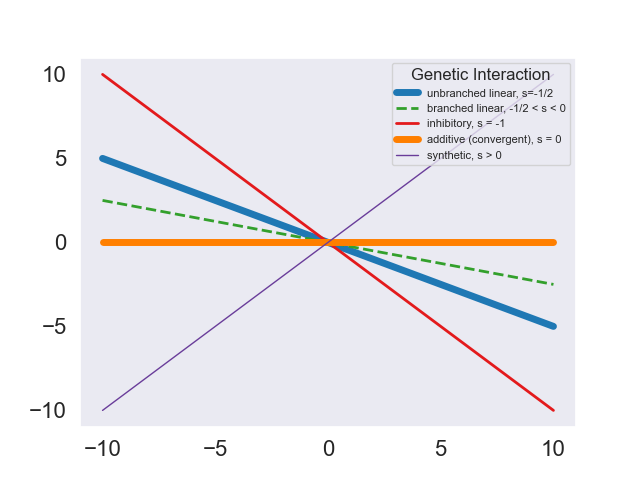

In [17]:
X = np.linspace(-10, 10)
Y = -1/2*X

plt.plot(X, -1/2*X, ls='-', color= '#1f78b4', lw=5,
         label='unbranched linear, s=-1/2')
plt.plot(X, -1/4*X, ls='--', color= '#33a02c',
         label='branched linear, -1/2 < s < 0')
plt.plot(X, -X, ls='-', lw=2, color= '#e31a1c',
         label='inhibitory, s = -1')
plt.plot(X, 0*X, 'k-', lw=5, color= '#ff7f00',
         label='additive (convergent), s = 0')
plt.plot(X, X, '-', lw=1,color= '#6a3d9a', 
         label='synthetic, s > 0')

lgd = plt.legend(loc=1, prop={'size': 8})
lgd.set_title('Genetic Interaction',
              prop=(mpl.font_manager.FontProperties(size=12)))
# plt.savefig('./q0.1/epistasis_plot_show_20240530.tiff', dpi=600, format="tiff", bbox_inches='tight')

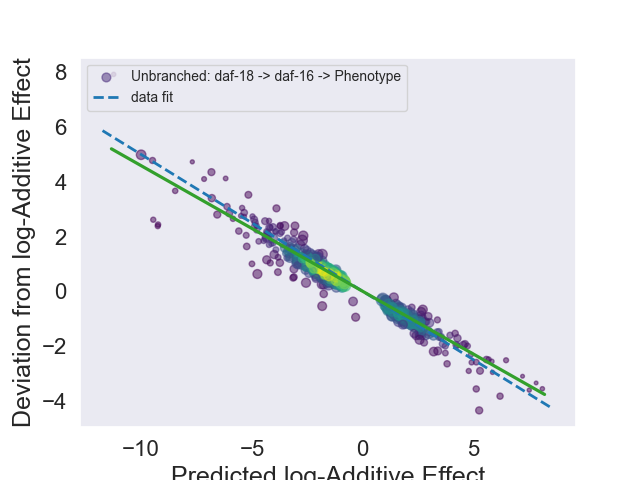

In [18]:
letter1 = 'b'
letter2 = 'c'
double = genvar.double_mapping[letter1 + letter2]
x, y, xy, ax = epi.make_epiplot([letter1, letter2], double, tidy_data)
plt.legend(('Unbranched: daf-18 -> daf-16 -> Phenotype', 'data fit'), loc=2, prop={'size':10})
# plt.savefig('./q0.1/epistasisdaf-18daf-16_20240540.tiff', dpi=600, format="tiff", bbox_inches='tight')

In [32]:
x, y, xy = epi.find_STP([letter1, letter2], double, tidy_data)
x.shape
y.shape
xy.shape
x.head()
y.head()
xy.head()
# 563 shared DEGs by two singles and the double, at q = 0.1 cutoff
# row orders are the same in three data frames

(563, 9)

(563, 9)

(563, 9)

,ens_gene,ext_gene,target_id,b,se_b,qval,genotype,sorter,code
3693,WBGene00015026,NaN,B0207.1,1.510282,0.411183,5.984538e-03,daf-18,2,b
3044,WBGene00003766,nlp-28,B0213.3,-0.851398,0.266348,2.452147e-02,daf-18,2,b
3697,WBGene00015067,cest-35.1,B0238.1,-1.099133,0.172483,3.040000e-08,daf-18,2,b
3699,WBGene00015076,NaN,B0238.12,-0.556046,0.185832,4.115380e-02,daf-18,2,b
3703,WBGene00015116,paic-1,B0286.3,-1.195462,0.226429,1.030000e-05,daf-18,2,b


,ens_gene,ext_gene,target_id,b,se_b,qval,genotype,sorter,code
599,WBGene00015026,NaN,B0207.1,1.199723,0.394848,4.458899e-02,daf-16,4,c
147,WBGene00003766,nlp-28,B0213.3,-1.121227,0.237548,1.410000e-04,daf-16,4,c
602,WBGene00015067,cest-35.1,B0238.1,-0.666953,0.153292,6.540000e-04,daf-16,4,c
603,WBGene00015076,NaN,B0238.12,-0.653423,0.183990,1.069719e-02,daf-16,4,c
606,WBGene00015116,paic-1,B0286.3,-1.281666,0.216578,3.870000e-07,daf-16,4,c


,ens_gene,ext_gene,target_id,b,se_b,qval,genotype,sorter,code
2126,WBGene00015026,NaN,B0207.1,1.748994,0.361957,5.430000e-05,daf-16;daf-18,7,f
1299,WBGene00003766,nlp-28,B0213.3,-0.870991,0.190310,1.630000e-04,daf-16;daf-18,7,f
2130,WBGene00015067,cest-35.1,B0238.1,-1.008087,0.172870,4.510000e-07,daf-16;daf-18,7,f
2131,WBGene00015076,NaN,B0238.12,-0.422315,0.165943,9.078402e-02,daf-16;daf-18,7,f
2133,WBGene00015116,paic-1,B0286.3,-1.572986,0.234895,2.960000e-09,daf-16;daf-18,7,f


In [35]:
ind = np.random.choice(np.arange(0, 500), size=500) # replace=True by default

In [40]:
currx = x.b.values[ind]
curry = y.b.values[ind]
currxy = xy.b.values[ind]

currsex = x.se_b.values[ind]
currsey = y.se_b.values[ind]
currsexy = xy.se_b.values[ind]

wadd = np.sqrt(currsex**2 + currsey**2)

X = currx + curry
Y = currxy - X
wdev = np.sqrt(wadd**2 + currsexy**2)

wadd.shape
wdev.shape

(500,)

(500,)

c:\Users\jingx\OneDrive - Duke University\lab\paper_outlines\lin35\figures_20240802\fig2\transcriptome_wide_analysis\epistasis_jingxian.py:445: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=s, label=labels[model.lower()],
c:\Users\jingx\OneDrive - Duke University\lab\paper_outlines\lin35\figures_20240802\fig2\transcriptome_wide_analysis\epistasis_jingxian.py:445: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=s, label=labels[model.lower()],
c:\Users\jingx\OneDrive - Duke University\lab\paper_outlines\lin35\figures_20240802\fig2\transcriptome_wide_analysis\epistasis_jingxian.py:445: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

Text(0.5, 0, 'Epistasis Coefficient')

Text(0, 0.5, 'Probability Density')

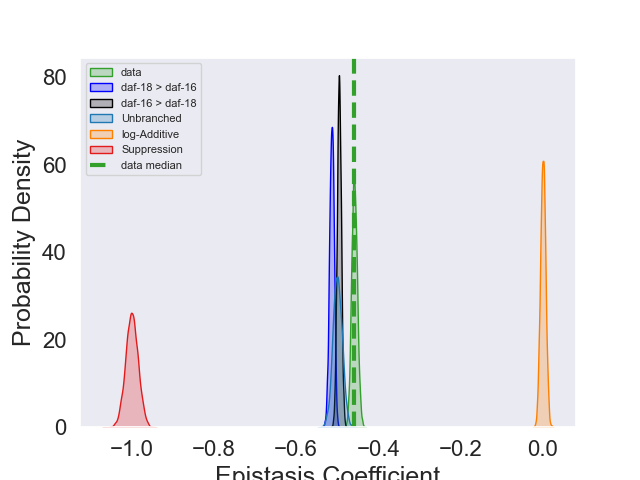

In [44]:
np.random.seed(1234)
s = epi.calculate_all_bootstraps(letter1, letter2, double,
                                 tidy_data, nsim=5000)

ax = epi.plot_bootstraps(letter1, letter2, s,
                         cumulative=False, shade=True)
plt.xlabel('Epistasis Coefficient')
plt.ylabel('Probability Density')
ax.legend(('data', 'daf-18 > daf-16', 'daf-16 > daf-18', 'Unbranched', 'log-Additive', 'Suppression', 'data median'), loc=2, prop={'size': 8})
# plt.savefig('./q0.1/supplementary_figure_daf-18daf-16_20240530.tiff', dpi=600, format="tiff", bbox_inches='tight')

In [18]:
# about 85% of daf-18's function acts through daf-16
(-1)*np.median(s['actual'])/(1+np.median(s['actual']))

0.8482800763303946

In [19]:
# bayes model fitting:
def log_likelihood_fixed(w, x, y, model, alpha=None):
    """Likelihood probability for the theoretical models of epistasis"""
    sigma = w
    epistasis = ['actual', 'xy=x', 'xy=y', 'xy=x=y', 'xy=x+y',
                 'suppress']
    
    # errors:
    if model not in epistasis:
        raise ValueError('model is not allowed')
    
    if (model is 'xy=x') or (model is 'xy=y'):
        if alpha is None:
            raise ValueError('alpha cannot be none for epistasis\
                             models `xy=x` or `xy=y`')
    
    # pick your model
    if model == 'xy=x+y':
        y_model = 0

    elif model == 'xy=x=y':
        y_model = -1/2*x

    elif model == 'suppress':
        y_model = -x

    elif (model == 'xy=x') or (model == 'xy=y'):
        y_model = alpha[model]*x
    
    # return the probability function
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) +\
                         (y - y_model) ** 2 / sigma ** 2)

def log_posterior_fixed(w, x, y, model, alpha=None):
    """The posterior probability of the theoretical models"""
    return log_likelihood_fixed(w, x, y, model, alpha)

def log_prior(theta):
    """Pareto prior, which makes the lines be evenly sampled
       between (-1,1) and plus\minus [1, infinity]."""
    return -1.5 * np.log(1 + theta ** 2)

def log_likelihood(theta, x, y, w):
    """Calculates the weighted chi-square for the free model"""
    sigma = w
    y_model = theta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + \
                         (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x, y, w):
    """The complete logarithm of the posterior"""
    return log_prior(theta) + log_likelihood(theta, x, y, w)

def neg_log_prob_free(theta, x, y, w):
    """Negative log of the posterior."""
    return -log_posterior(theta, x, y, w)

def model_selection(X, Y, wdev, alpha, **kwargs):
    """
    Finds MAP for the free model, then does OR calculation for free
    model versus theoretical predictions.
    
    Params:
    -------
    X - The x-coordinates of the points to be used
    Y - y-coordinates
    wdev - the error in the y-coordinates
    alpha - slope for XY=X and XY=Y models. Must be a dictionary of
            the form {'XY=X': a number, 'XY=Y': a number}
    guess - starting guess for the MAP approximation (we will use the
            output from scipy.ODR)
    
    Outputs:
    Prints the OR for the models.
    """
    guess = kwargs.pop('guess', -0.5)
    
    # calculate probability of free model:
    res = scipy.optimize.minimize(neg_log_prob_free, guess,
                                  args=(X, Y, wdev), method='Powell')
    
    # Compute error bars
    second_derivative = scipy.misc.derivative(log_posterior, res.x,
                                              dx=1.0, n=2, args=(X, Y, wdev), order=3)
    cov_free = -1/second_derivative
    alpha_free = np.float64(res.x)
    log_free = log_posterior(alpha_free, X, Y, wdev)
    
    # log goodness of fit for fixed models    
    eps = ['xy=x', 'xy=y', 'xy=x=y', 'xy=x+y',
           'suppress']
    good_fits = {}
    
    for epistasis in eps:
        log_MAP = log_posterior_fixed(wdev, X, Y, model=epistasis,
                                      alpha=alpha)
        
        good_fits[epistasis] = log_free - log_MAP


        # occam factor - only the free model has a penalty
        log_occam_factor =(-np.log(2 * np.pi) + np.log(cov_free) 
                           - 0) / 2
        
        # give more standing to simpler models. but just a little bit!
        lg = log_free - log_MAP + log_occam_factor - 2
        print('{0} Odds Ratio: {1}'.format(epistasis, np.exp(lg)))

    std = np.float64(np.sqrt(cov_free))
    m = 'the value used for the observed fit was {0:.3g} +/- {1:.3g}'
    print(m.format(alpha_free, std))


<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\jingx\AppData\Local\Temp\ipykernel_17124\3792384835.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (model is 'xy=x') or (model is 'xy=y'):
C:\Users\jingx\AppData\Local\Temp\ipykernel_17124\3792384835.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (model is 'xy=x') or (model is 'xy=y'):


In [20]:
# reject when OR > 10^3
# x is daf-18
# y is daf-16
alpha_d18d16 = {'xy=x': s['xy=x'].mean(), 
                'xy=y': s['xy=y'].mean()
                }

In [21]:
actual = epi.ODR([x,y], xy, epistasis='actual')
X = x.b.values + y.b.values
Y = xy.b.values - X
wdev = np.sqrt(x.se_b.values**2 + y.se_b.values**2 + xy.se_b.values**2)
model_selection(X, Y, wdev, alpha=alpha_d18d16, guess=actual.beta[0])

xy=x Odds Ratio: [8.35946289e+09]
xy=y Odds Ratio: [919.9785799]
xy=x=y Odds Ratio: [21346.15481215]
xy=x+y Odds Ratio: [inf]
suppress Odds Ratio: [inf]
the value used for the observed fit was -0.455 +/- 0.00749


C:\Users\jingx\AppData\Local\Temp\ipykernel_17124\3792384835.py:83: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  second_derivative = scipy.misc.derivative(log_posterior, res.x,
C:\Users\jingx\AppData\Local\Temp\ipykernel_17124\3792384835.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha_free = np.float64(res.x)
C:\Users\jingx\AppData\Local\Temp\ipykernel_17124\3792384835.py:107: RuntimeWarning: overflow encountered in exp
  print('{0} Odds Ratio: {1}'.format(epistasis, np.exp(lg)))
C:\Users\jingx\AppData\Local\Temp\ipykernel_17124\3792384835.py:109: DeprecationWarning: Conversion of an array with ndim > 0 